In [1]:
import numpy as np
import h5py 
import pypllon as plon
import matplotlib.pyplot as pl

from scipy import stats
from scipy.linalg import dft
from glob import glob

4624.47177419


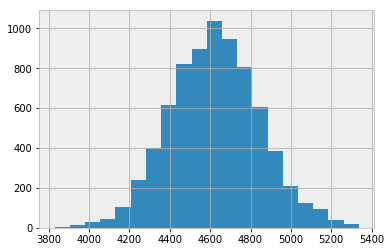

In [2]:
# determine the usual count level in experiments

counts_per_s = []
for fname in glob('../data/M5*.h5'):
    with h5py.File(fname) as buf:
        for data in buf['GAUSS/RAWCOUNTS'].values():
            means = np.sum(data, axis=1)
            counts_per_s.append(means)

pl.hist(np.ravel(counts_per_s), bins=20)
COUNTS_PER_S = np.mean(np.ravel(counts_per_s))
print(COUNTS_PER_S)

In [3]:
from tqdm import tqdm

def recons_error(target, recov):
    a, b = plon.fix_phases('rows_by_max', target, recov)
    return np.linalg.norm(a - b)

def sample(budget, m, M):
    dim = len(M)
    invecs = plon.invecs_recr(dim, m)
    ps = np.abs(invecs @ M.T)**2
    n = budget // m
    ps_estim = np.array([stats.multinomial(n, p=p).rvs().ravel() / n for p in ps])
    recons = plon.recover(invecs, ps_estim)
    return recons_error(M, recons)

def experiment(budget, ms, M, samples=100):
    res = [[sample(budget, m, M) for _ in range(samples)] for m in ms]
    return np.array(res)

100%|██████████| 23/23 [37:28<00:00, 97.75s/it]


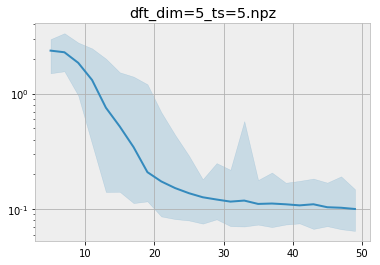

  4%|▍         | 1/23 [00:46<17:09, 46.79s/it]/Users/dsuess/Code/pypllon/pypllon/postprocessing.py:65: RuntimeWarning: invalid value encountered in true_divide
  phase = lambda x: x / np.abs(x)
100%|██████████| 23/23 [36:49<00:00, 96.06s/it]
/Users/dsuess/Library/Miniconda3/envs/phd/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


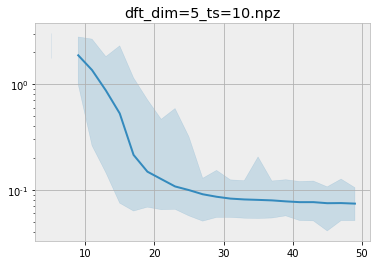

100%|██████████| 23/23 [38:03<00:00, 99.27s/it]


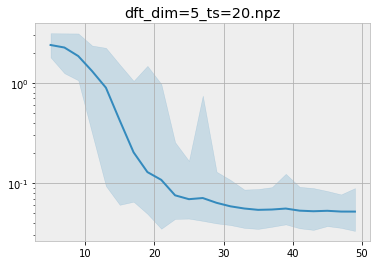

100%|██████████| 23/23 [42:00<00:00, 109.58s/it]


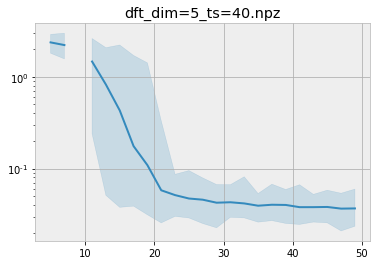

In [4]:
M = dft(5, 'sqrtn')
ms = np.arange(5, 51, 2)
samples = 100

for ts in [5, 10, 20, 40]:
    budget = ts * 4600
    errors = experiment(budget, tqdm(ms), M, samples=samples)
    fname = f'dft_dim={len(M)}_ts={ts}.npz'
    np.savez('../data/' + fname, ms, errors)
    mus, sigmas = np.mean(errors, axis=1), np.std(errors, axis=1)
    
    l, = pl.semilogy(ms, mus)
    pl.fill_between(ms, np.min(errors, axis=1), np.max(errors, axis=1), alpha=0.2, color=l.get_color())
    pl.title(fname)
    pl.show()

100%|██████████| 30/30 [4:59:49<00:00, 599.65s/it]  


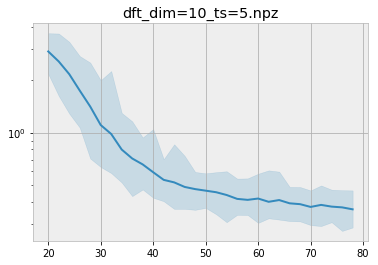

100%|██████████| 30/30 [4:11:48<00:00, 503.63s/it]  


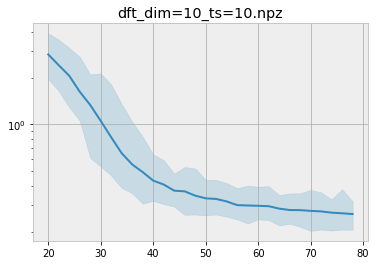

100%|██████████| 30/30 [4:14:39<00:00, 509.31s/it]  


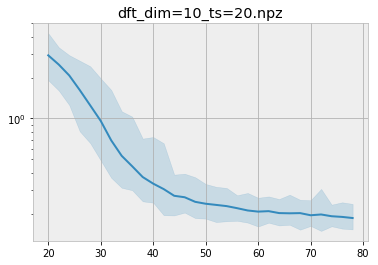

100%|██████████| 30/30 [4:38:38<00:00, 557.28s/it]  


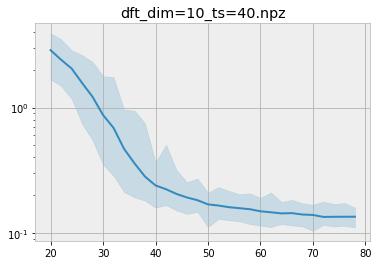

In [5]:
M = dft(10, 'sqrtn')
ms = np.arange(20, 80, 2)
samples = 100

for ts in [5, 10, 20, 40]:
    budget = ts * 4600
    errors = experiment(budget, tqdm(ms), M, samples=samples)
    fname = f'dft_dim={len(M)}_ts={ts}.npz'
    np.savez('../data/' + fname, ms, errors)
    mus, sigmas = np.mean(errors, axis=1), np.std(errors, axis=1)
    
    l, = pl.semilogy(ms, mus)
    pl.fill_between(ms, np.min(errors, axis=1), np.max(errors, axis=1), alpha=0.2, color=l.get_color())
    pl.title(fname)
    pl.show()